# 一 环境搭建

conda create -n [name] python=3.8 其中[name]改成自己的环境名
如[name]->torch，conda create -n torch python=3.8

## 我的测试环境如下

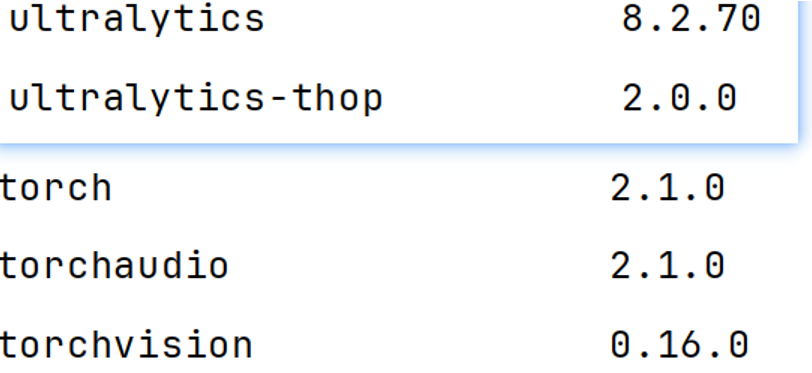

# 二 数据集准备

YOLO数据集的格式主要包括以下几部分:
+ 图像文件:这是数据集中的图像文件，通常是jpg或png格式。
+ 标注文件:这是一个文本文件，包含了每张图像中目标对象的类别和位置信息。
+ 类别文件:这是一个文本文件，包含了数据集中所有目标对象的类别信息。                            

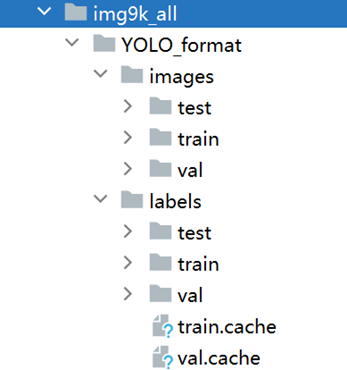

 文件位于 Y:\basicAI\ROItools\Yolov8\img9k_all
 
 Images文件下为具体图片
 
Labels文件下为Yolo标记文件
 
 Cache文件为训练时生成文件，不用管 


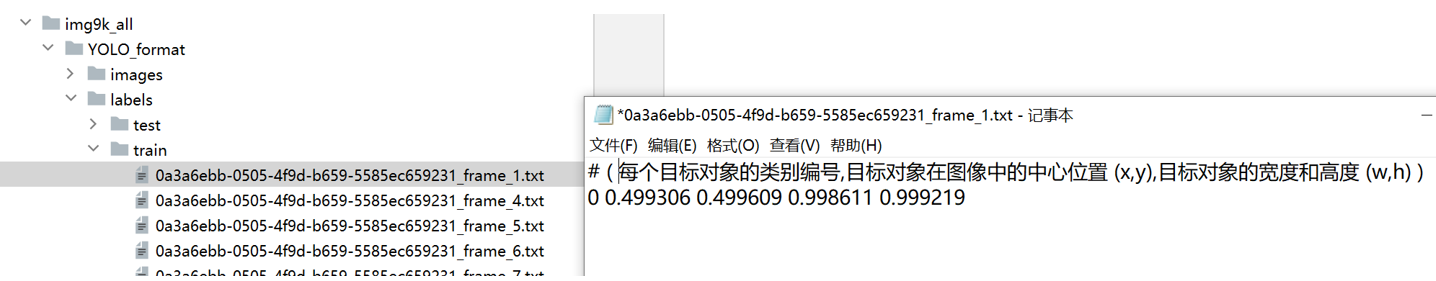

# 三 配置文件解释

Yolov8.yaml文件位于 \py38\Lib\site-packages\ultralytics\cfg\models\v8 训练路径和网络结构文件

Default.yaml文件位于 \py38\Lib\site-packages\ultralytics\cfg\ 默认配置文件，参数可在这里面更改或者在代码中添

下文使用的v1,v2.yaml基于此构建加


# 四 训练

官方API：https://docs.ultralytics.com/usage/cfg/

模型预览
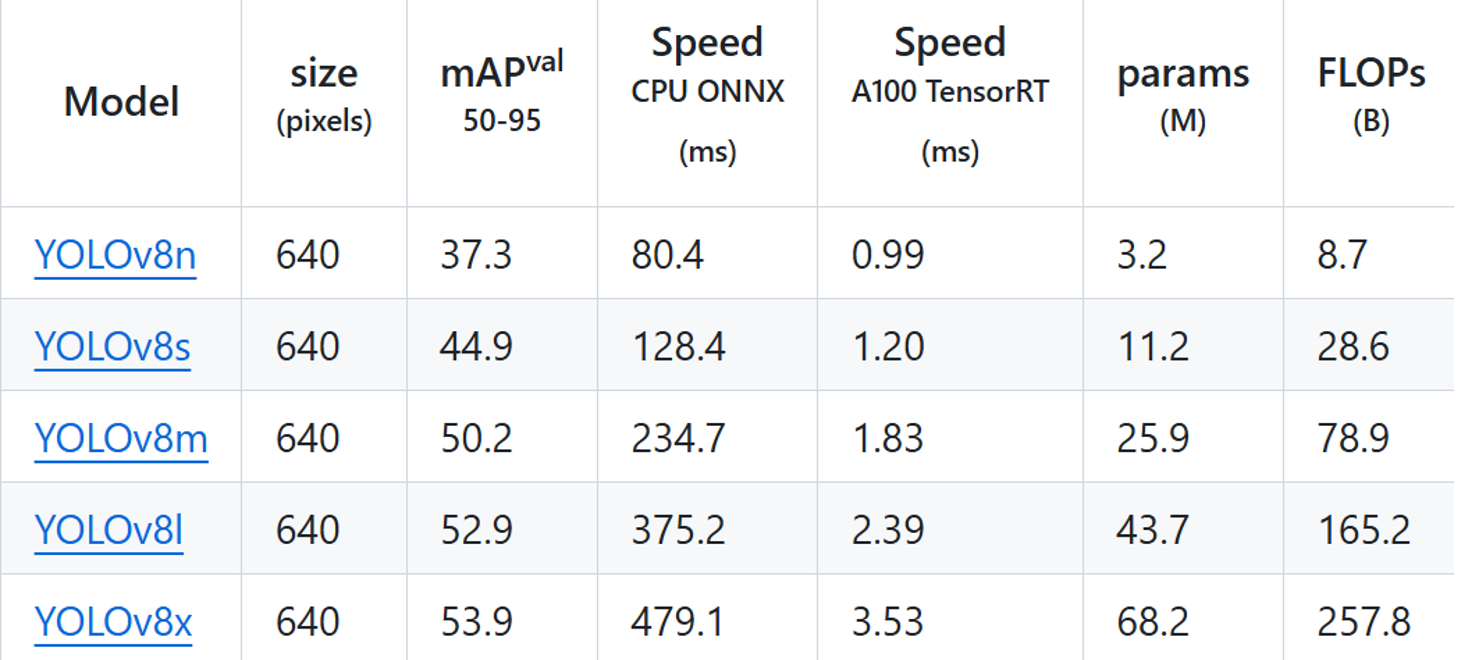

In [4]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="coco8.yaml", epochs=1, imgsz=640)  

# Run inference with the YOLOv8n model on the 'bus.jpg' image
results = model("bus.jpg")
path = model.export(format="onnx")  # export the model to ONNX format

YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
Ultralytics YOLOv8.2.70  Python-3.8.8 torch-2.1.0 CUDA:0 (NVIDIA GeForce GTX 1070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=1, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

train: Scanning D:\PyCharm Community Edition 2024.1.4\PythonPreject\Awesome-Backbones-main\Yolov8\datasets\coco8\labels
val: Scanning D:\PyCharm Community Edition 2024.1.4\PythonPreject\Awesome-Backbones-main\Yolov8\datasets\coco8\labels\v


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      1.98G       1.07       3.51      1.515         21        640: 100%|██████████| 1/1 [00:00<00:00,  5.95
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          4         17       0.62      0.877      0.888      0.612

1 epochs completed in 0.031 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.2.70  Python-3.8.8 torch-2.1.0 CUDA:0 (NVIDIA GeForce GTX 1070 Ti, 8192MiB)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          4         17      0.618       0.88      0.888      0.614
                person          3         10      0.672        0.5       0.52      0.278
                   dog          1          1       0.36          1      0.995      0.597
                 horse          1          2      0.734          1      0.995      0.598
              elephant          1          2      0.592      0.777      0.828      0.319
              umbrella          1          1      0.556          1      0.995      0.995
          potted plant          1          1      0.795          1      0.995      0.895
Speed: 0.8ms preprocess, 5.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train4

image 1/1 F:\d2l-zh\pytorch\doc\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Ultralytics YOLOv8.2.70  Python-3.8.8 torch-2.1.0 CPU (AMD Ryzen 5 5600G wit

注：使用yolov8n.yaml 和 yolov8n.pt文件等效

## 评估指标：
### mAP50（mean Average Precision at 50% IOU）
	是一种评估目标检测模型性能的指标，它使用50%的交并比（IoU）作为阈值来计算模型的平均精度。这意味着只有当预测边界框与真实边界框的IoU至少达到50%时，该预测才被视为正确。
### mAP50-95
	mAP50-95则是在0.50至0.95之间的不同IoU阈值下计算得出的平均精度的平均值，它通过在多个IoU阈值下评估模型性能，然后取这些值的平均，从而提供了一个更全面的模型性能视图。


# 四 模型评估

In [5]:
results = model.track(source="https://youtu.be/LNwODJXcvt4", show=True, tracker="bytetrack.yaml")

1

# 五 格式转换

In [6]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.2.70  Python-3.8.8 torch-2.1.0 CPU (AMD Ryzen 5 5600G with Radeon Graphics)

PyTorch: starting from 'runs\detect\train4\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success  0.7s, saved as 'runs\detect\train4\weights\best.onnx' (12.2 MB)

Export complete (2.1s)
Results saved to F:\d2l-zh\pytorch\doc\runs\detect\train4\weights
Predict:         yolo predict task=detect model=runs\detect\train4\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train4\weights\best.onnx imgsz=640 data=C:\Users\admin\.conda\envs\py38\Lib\site-packages\ultralytics\cfg\datasets\coco8.yaml  
Visualize:       https://netron.app
